# Project Python Foundations: FoodHub Data Analysis

Name : Jonathan Brosnan

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for warnings
#import warnings

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Write your code here to read the data
df = pd.read_csv('/content/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observations:
1. Order_id is the order number assigned to the purchase that was made by the customer. Customer_id is the specific number that a customer is identified with during every purchase. Both order_id and customer_id are unique. One customer can have many orders. One order cannot have many customers. This a one to many relationship when going from customer_id to order_id.
2. The rest of the columns contain information that is used during the purchasing and delivery of an order. The days_of_the_week column only contains 2 choices(Weekday or Weekend).
3. Each rating given corresponds to each individual order instead of the restaurant itself. Two restaurants(Hangawi and Blue Ribbon) have ratings marked as "Not given", while the rest have ratings between 3 and 5. This makes the rating column non-numerical.
4. The numerical columns are cost_of_the_order, food_preparation_time, and delivery_time. Order_id and customer_id are considered unique identifiers so they do not count as true numerical data.
5. The columns restaurant_name, cuisine_type, and day_of_the_week, and rating are categorical.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

#### Observations: The dataset has **1898 rows** and **9 columns**.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. Each of the 9 columns have 1,898 observations records/observations which indicates that there are no missing values.
2. All the categorical columns are *object* types.
3. It would have been better there were date-time type columns for when the  order place, when the cook handed off the food to service, and for when the order was delivered to the destination. Food_preparation_time and delivery_time could be autofilled based the times recorded by employees. It would be much simpler for them.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#Ignoring a panda warning that comes with using the necessary libraries
#warnings.simplefilter('ignore', FutureWarning)

#Display the missing values(null) for each column
print("Null Values per Column")
print(df.isna().sum())

#If there are any missing values in the dataset
if df.isna().sum().sum():

  #Replace the missing values with NaN placeholders
  df.fillna('NaN', inplace=True)
  #Show details for df to deal with missing values
  print(df.value_counts())
else:
  print("There are no missing values.")

#Resetting the ignored warnings
#warnings.resetwarnings()

Null Values per Column
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
There are no missing values.


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Display the statistical summary of all the columns in the dataset
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [10]:
print("Food Preparation Summary Stats:") #Rounded to 2 decimal places
print(f"Minimum Time: {df['food_preparation_time'].min():.2f} min")
print(f"Average Time: {df['food_preparation_time'].mean():.2f} min")
print(f"Maximum Time: {df['food_preparation_time'].max():.2f} min")

Food Preparation Summary Stats:
Minimum Time: 20.00 min
Average Time: 27.37 min
Maximum Time: 35.00 min


#### Observations:
* The fastest an order's food preparation time has taken is 20 minutes.
* The longest an order's food preparation time has taken is 35 minutes.
* The average food preparation time for an order is about 27.37 minutes.
*The cost of orders ranges from \$4.47 to \$35.41 with an average cost of \$16.50.






### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
print(df['rating'].value_counts())
print(f"The number of not rated orders is {df['rating'].value_counts()['Not given']}.")

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
The number of not rated orders is 736.


#### Observations:


*   736 orders have not been given a rating yet.
*   588 orders have been given a rating of 5.
*   386 orders have been given a rating of 4.
*   188 orders have been given a rating of 3.
* The total order amount sums up to 1,898 orders.
* No orders have been rated a 1 or 2 as of today.




## Exploratory Data Analysis (EDA)

## Univariate Analysis

**Let us first explore the numerical variables.**

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting **Histograms** and **Boxplots**

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observations per bin is represented by the height of the bar

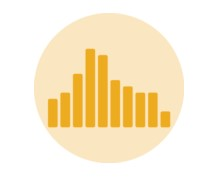



A boxplot gives a summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

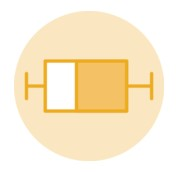

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Exploring Variables and Providing Observations

#### Numerical Columns: Histograms

In [12]:
num_cols=['cost_of_the_order','food_preparation_time','delivery_time']


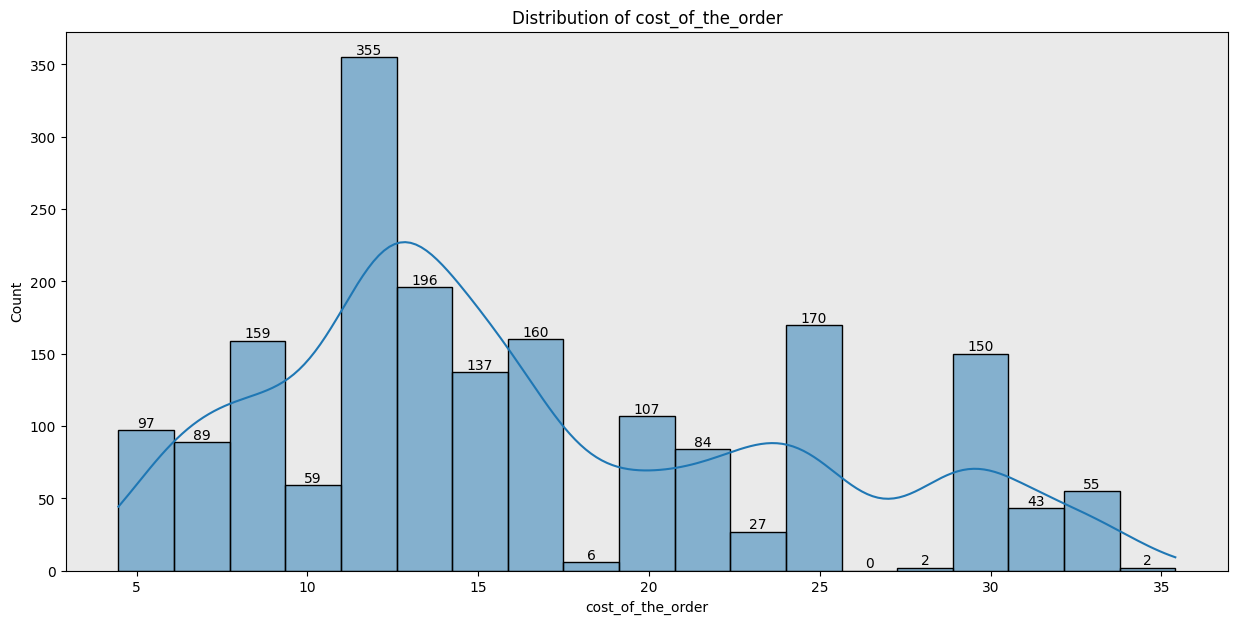

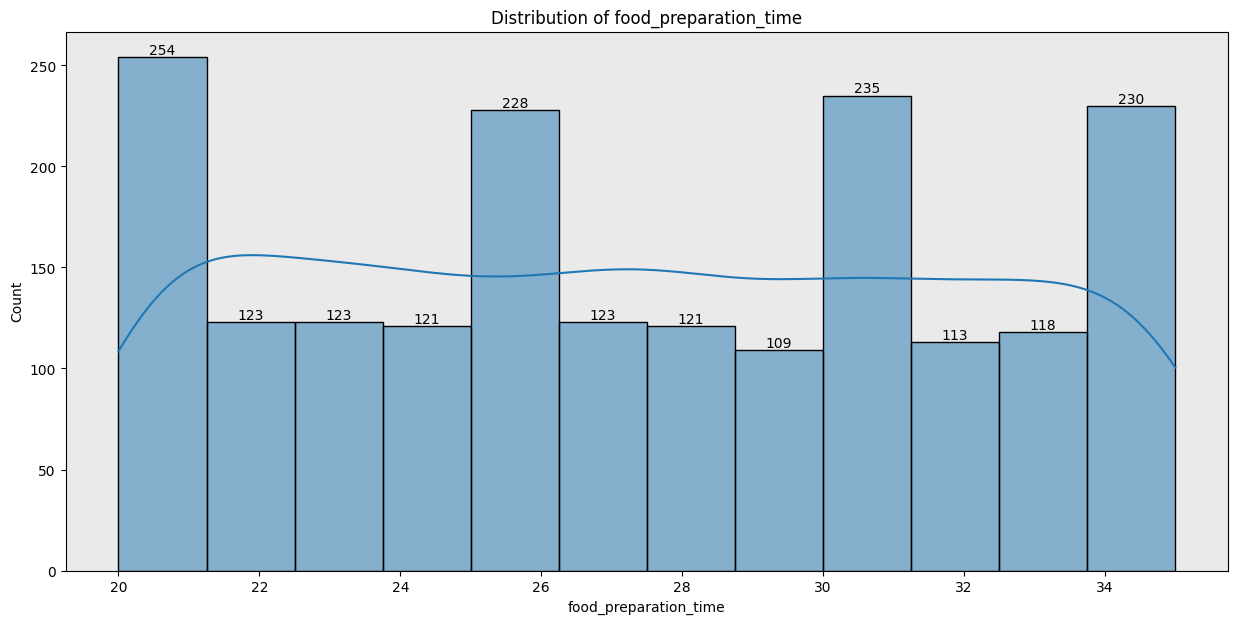

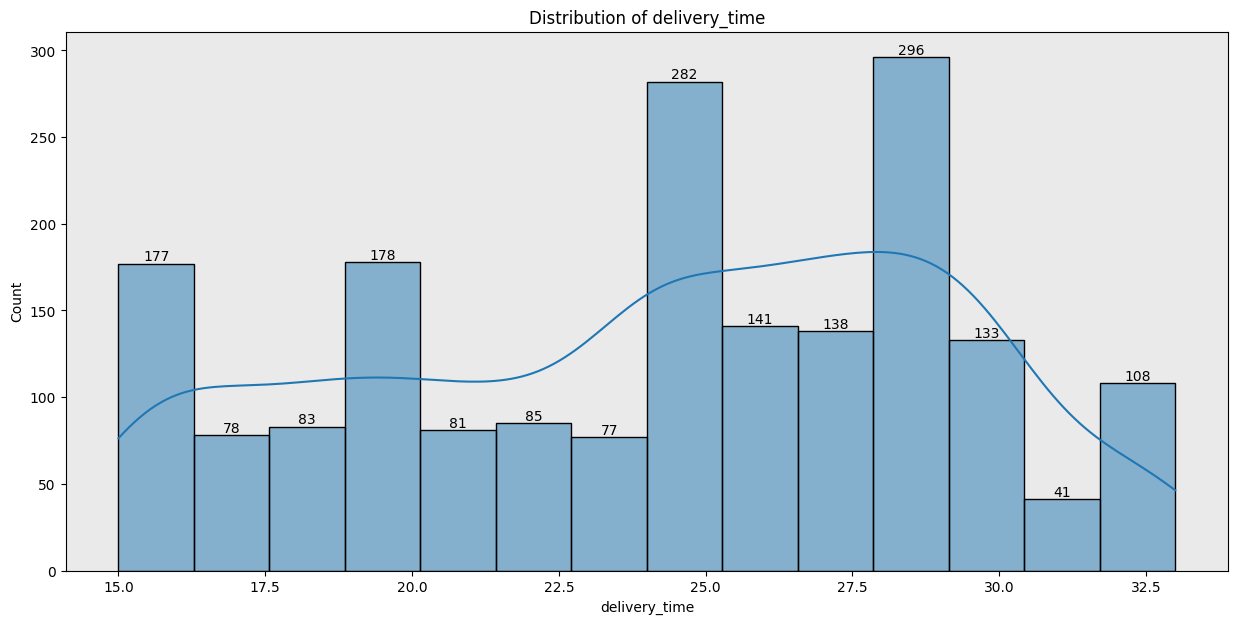

In [13]:
for col in num_cols:
  plt.figure(figsize=(15, 7))
  ax = sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Distribution of {col}')
  for container in ax.containers:
    ax.bar_label(container)
  ax.set_facecolor('#eaeaea')
  plt.show()

#### Numerical Columns: Boxplot

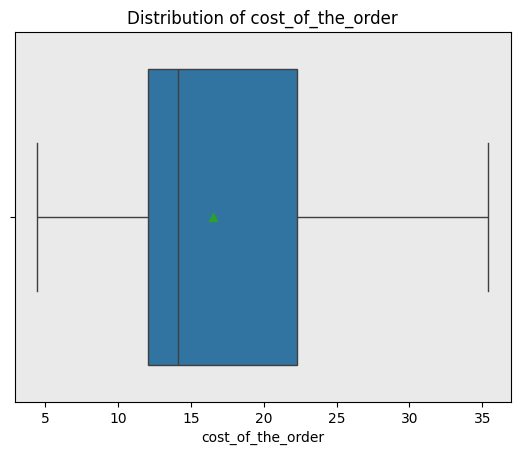

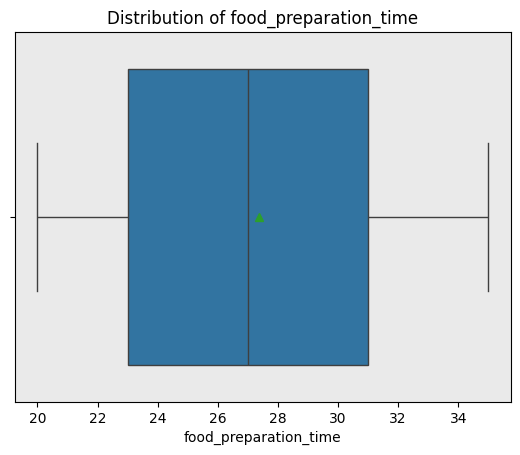

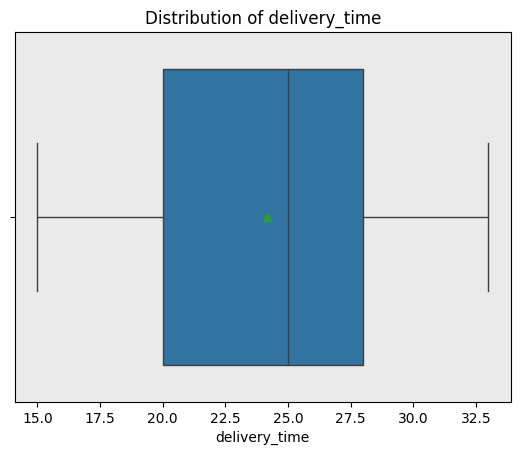

In [14]:
for col in num_cols:
  sns.boxplot(data=df, x=col, showmeans=True).set_facecolor('#eaeaea')
  plt.title(f'Distribution of {col}')
  plt.show()

#### Categorical Columns: Countplot

In [15]:
cat_cols=['restaurant_name','cuisine_type','day_of_the_week','rating']

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


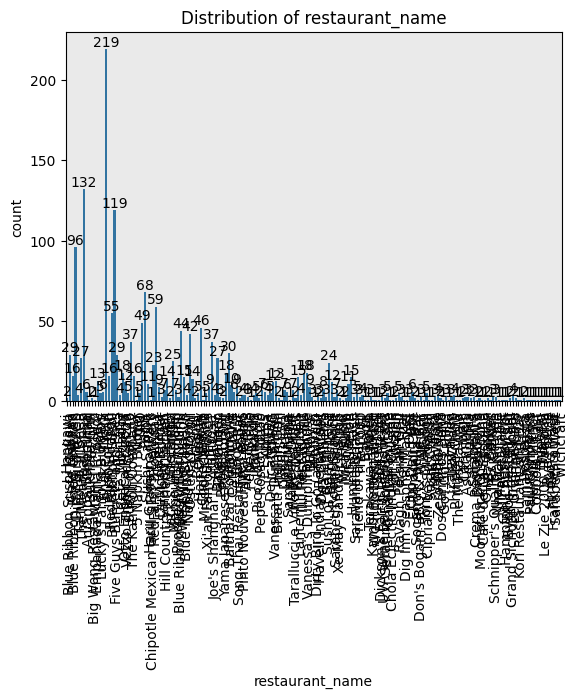

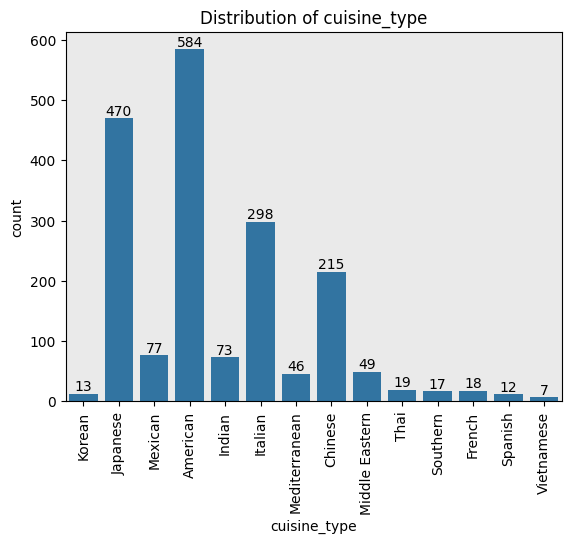

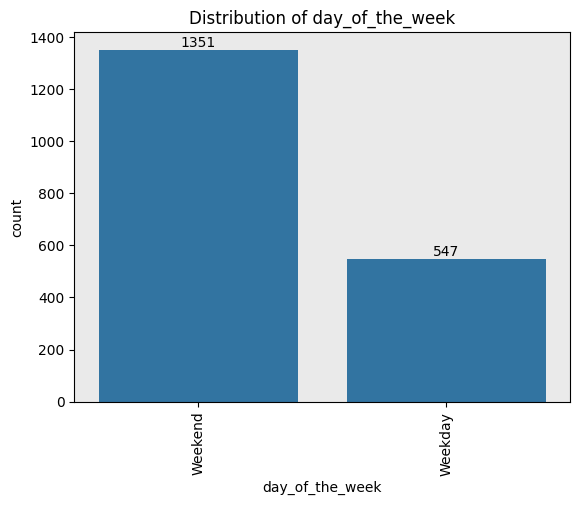

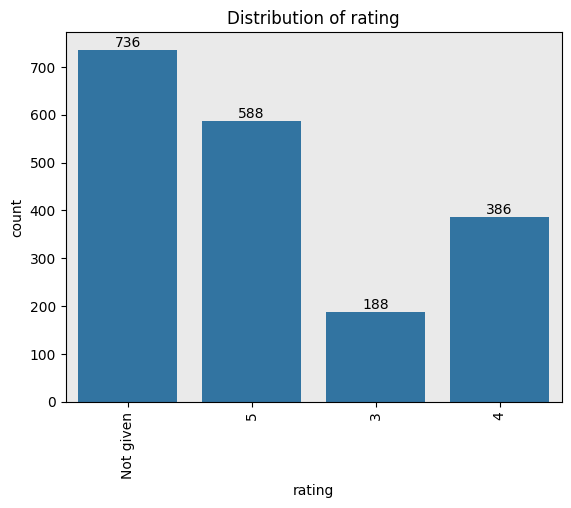

In [16]:
for col in cat_cols:
  ax = sns.countplot(data=df,x=col)
  plt.xticks(rotation=90)
  plt.title(f'Distribution of {col}')
  for container in ax.containers:
    ax.bar_label(container)
  ax.set_facecolor('#eaeaea')
  plt.show()

#### Customer ID

Total number of customers: 1200


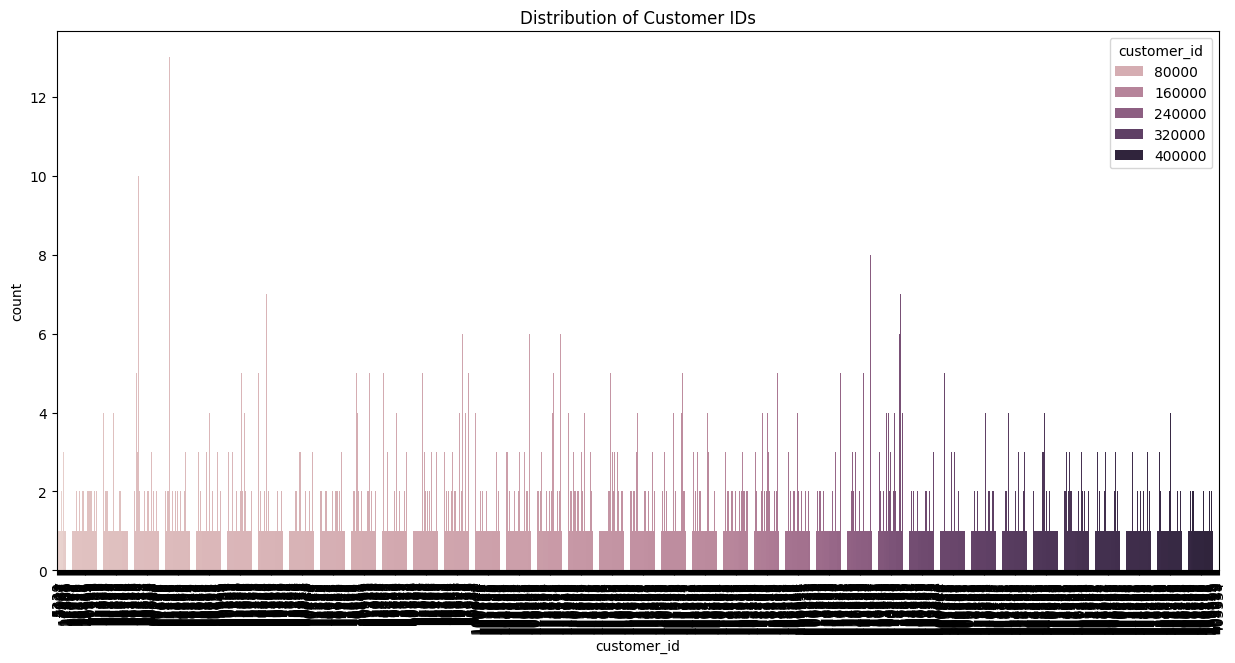

In [17]:
#Total number of unique customers
print(f"Total number of customers: {df['customer_id'].nunique()}")
plt.figure(figsize=(15, 7))
sns.countplot(data=df,x='customer_id',hue='customer_id')
plt.xticks(rotation=90)
plt.title('Distribution of Customer IDs')
plt.show()


#### Restaurant Name

In [18]:
#Total number of unique restaurants
print(f"Total number of restaurants: {df['restaurant_name'].nunique()}")

Total number of restaurants: 178


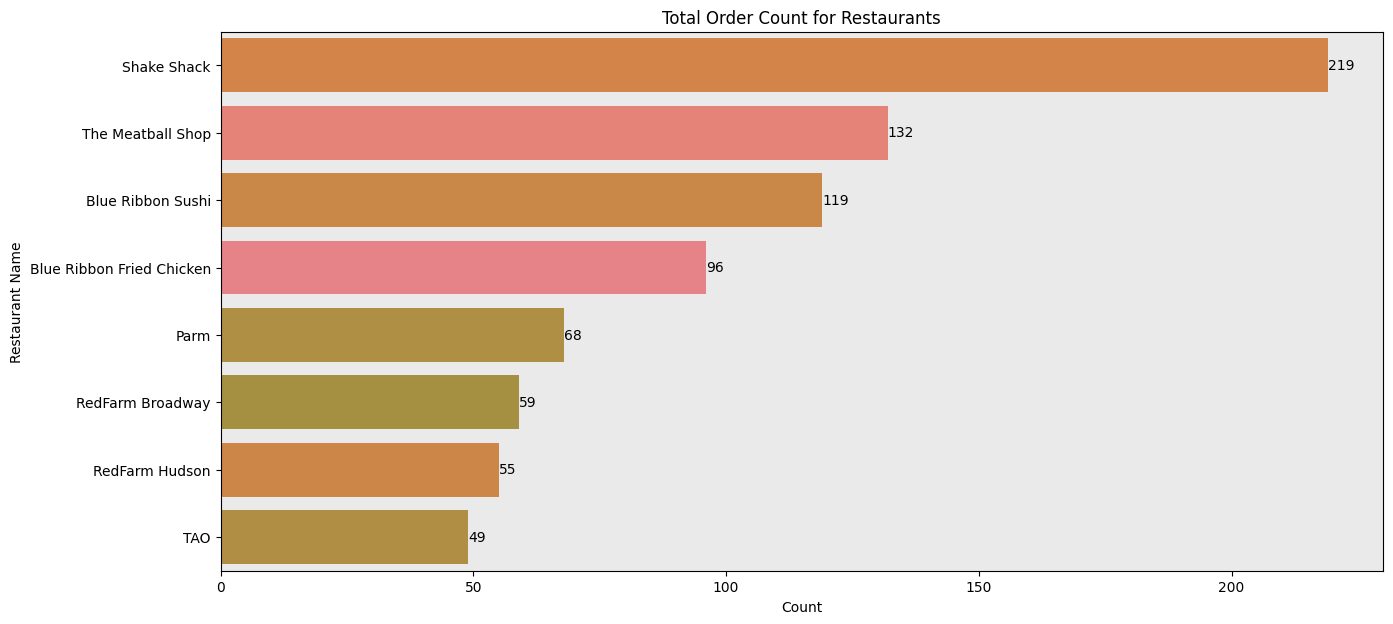

In [19]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, y='restaurant_name', order = df['restaurant_name'].value_counts().iloc[:8].index,hue='restaurant_name')
plt.title('Total Order Count for Restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

#### Cuisine Type

In [20]:
#Total number of unique cuisine types
print(f"Total number of cuisine types: {df['cuisine_type'].nunique()}")

Total number of cuisine types: 14


**Countplot:**

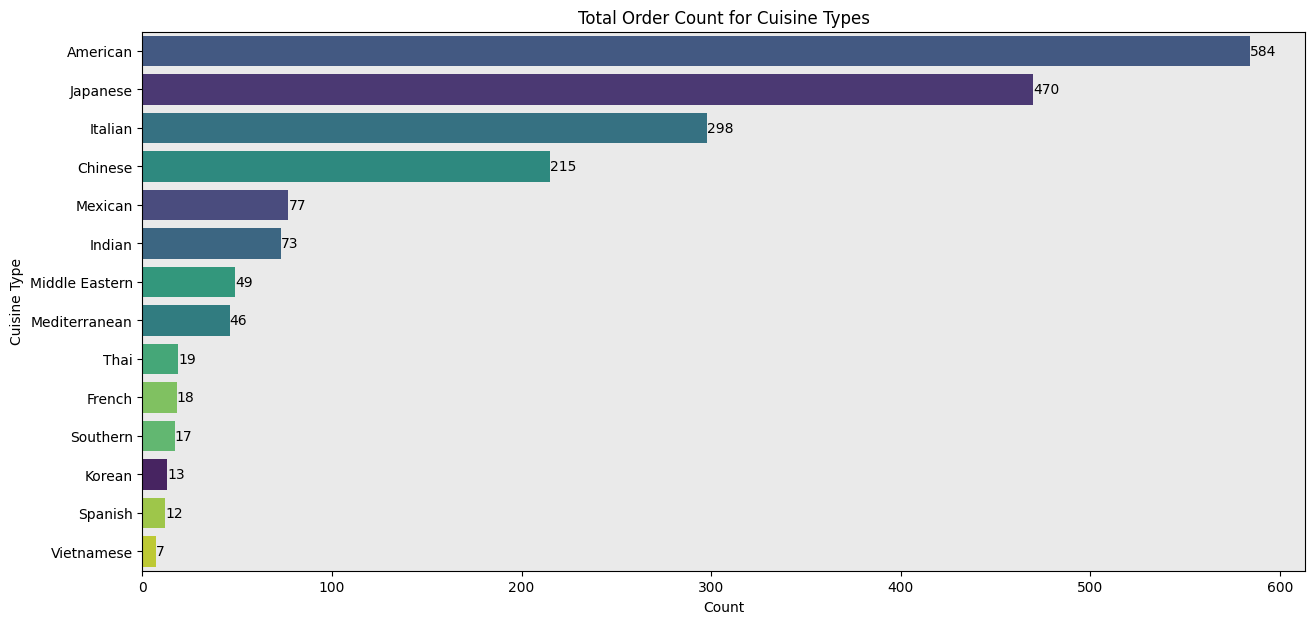

In [21]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, y='cuisine_type', order = df['cuisine_type'].value_counts().index, palette='viridis',hue='cuisine_type')
plt.title('Total Order Count for Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations: American is the top cuisine type with 584 orders. Vietnamese is the least ordered cuisine type with 7 orders.






#### Cost of the Order

In [22]:
# Write the code here

**Histogram:**

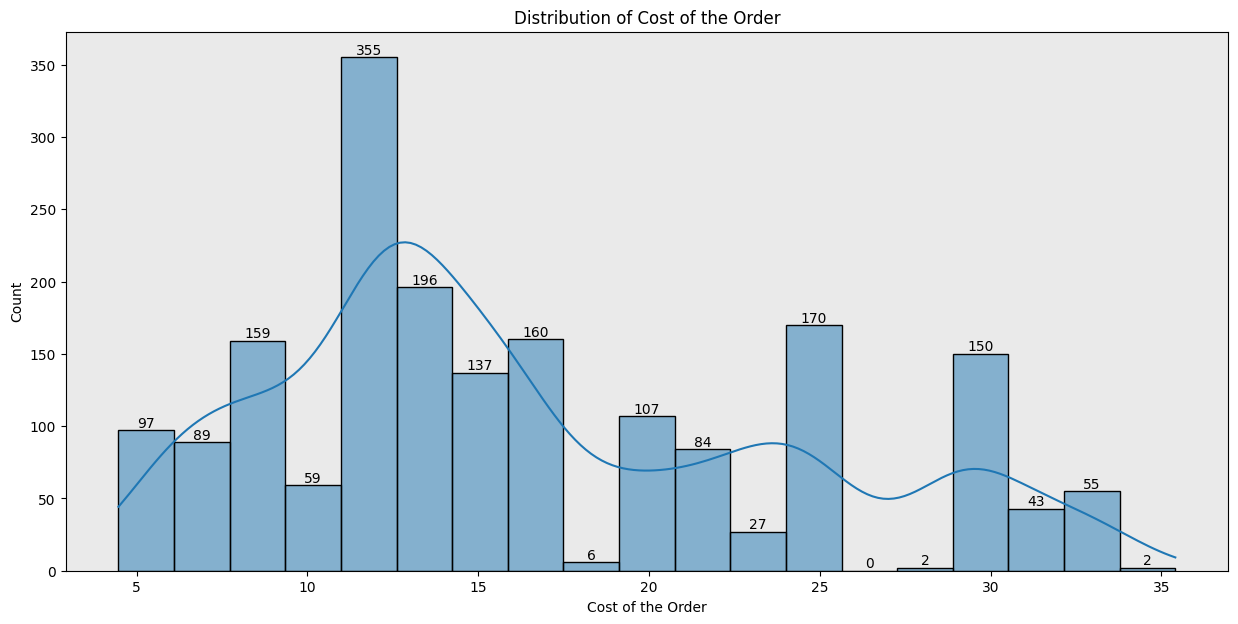

In [23]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations: Most of the orders cost between 10-15 dollars.

**Boxplot:**

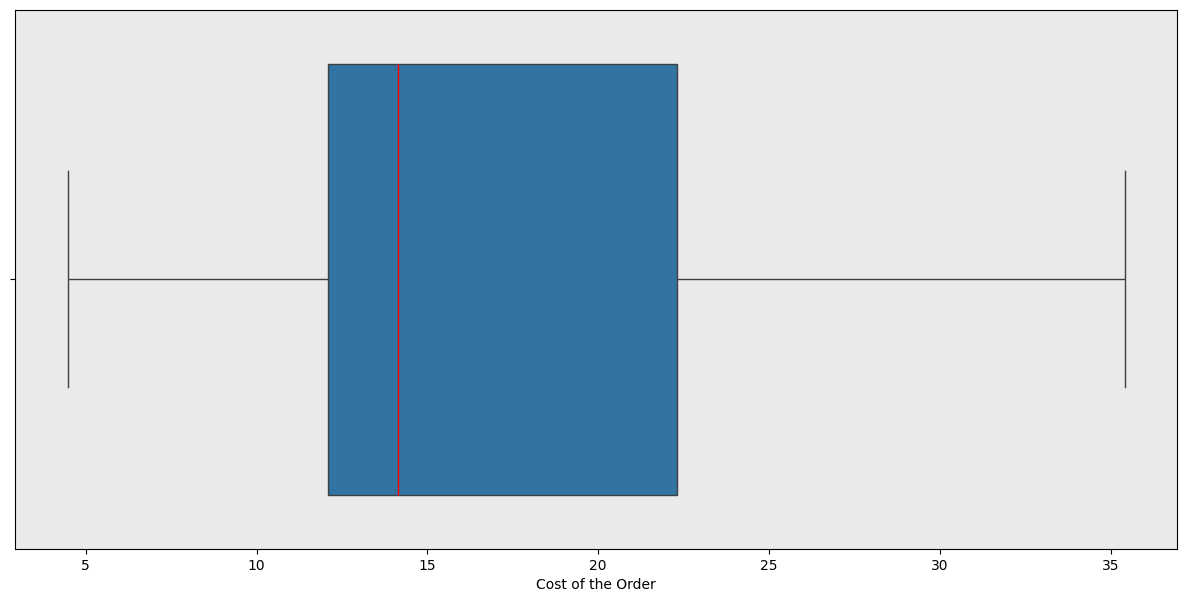

In [24]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='cost_of_the_order', medianprops = {'color':'r'})
plt.xlabel('Cost of the Order')
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

**Pointplot:**

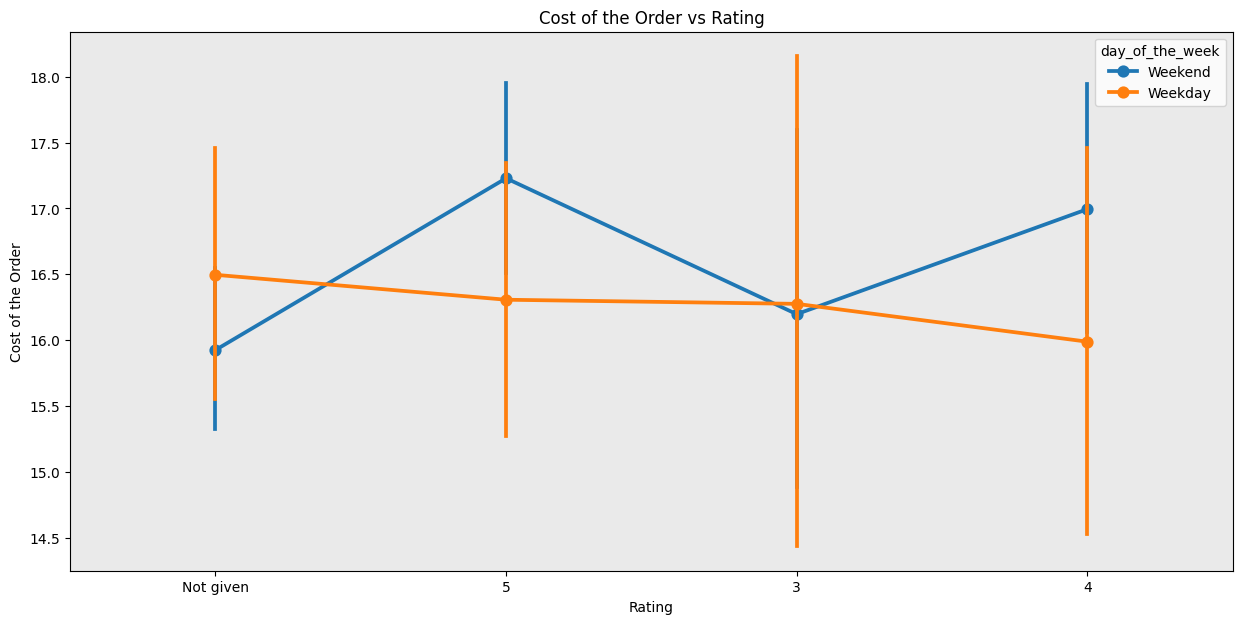

In [25]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(data=df, x='rating', y='cost_of_the_order', hue='day_of_the_week').set_facecolor('#eaeaea')
plt.title('Cost of the Order vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

Observations:

#### Day of the Week

In [26]:
#Total number of unique days of the week options
print(f"Total number of days of the week options: {df['day_of_the_week'].nunique()}")

Total number of days of the week options: 2


**Countplot:**

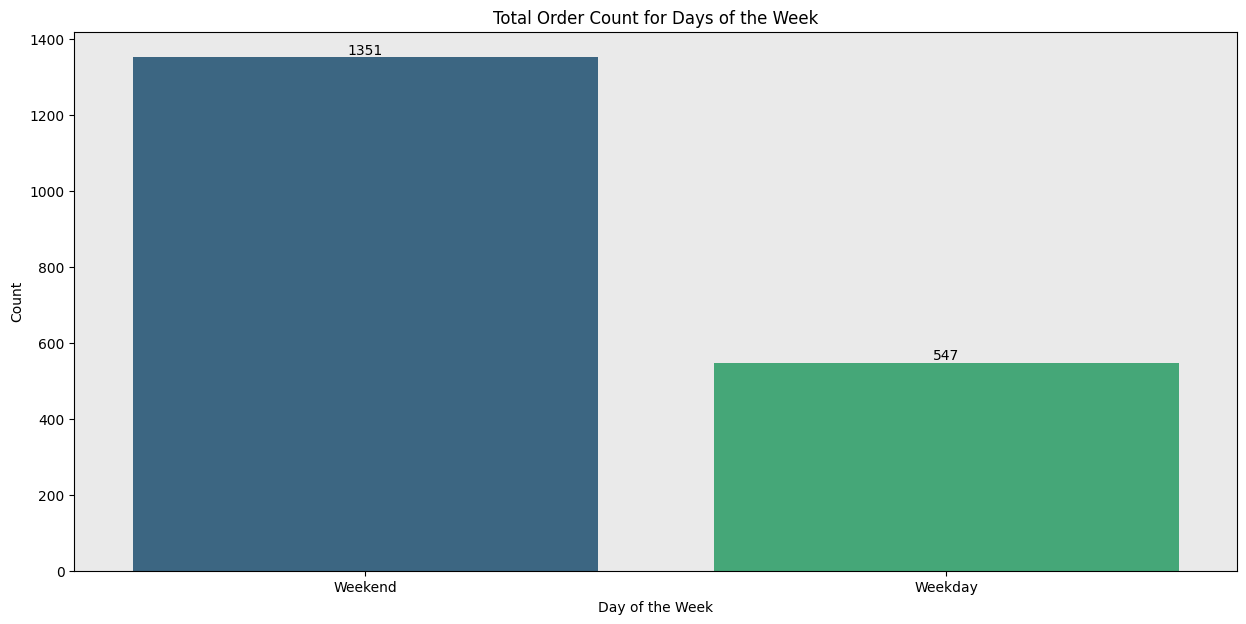

In [27]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='day_of_the_week',order=df['day_of_the_week'].value_counts().index, palette='viridis',hue='day_of_the_week')
plt.title('Total Order Count for Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

#### Rating

In [28]:
#Total number of unique rating options
print(f"Total number of rating options: {df['rating'].nunique()}")

Total number of rating options: 4


**Countplot:**

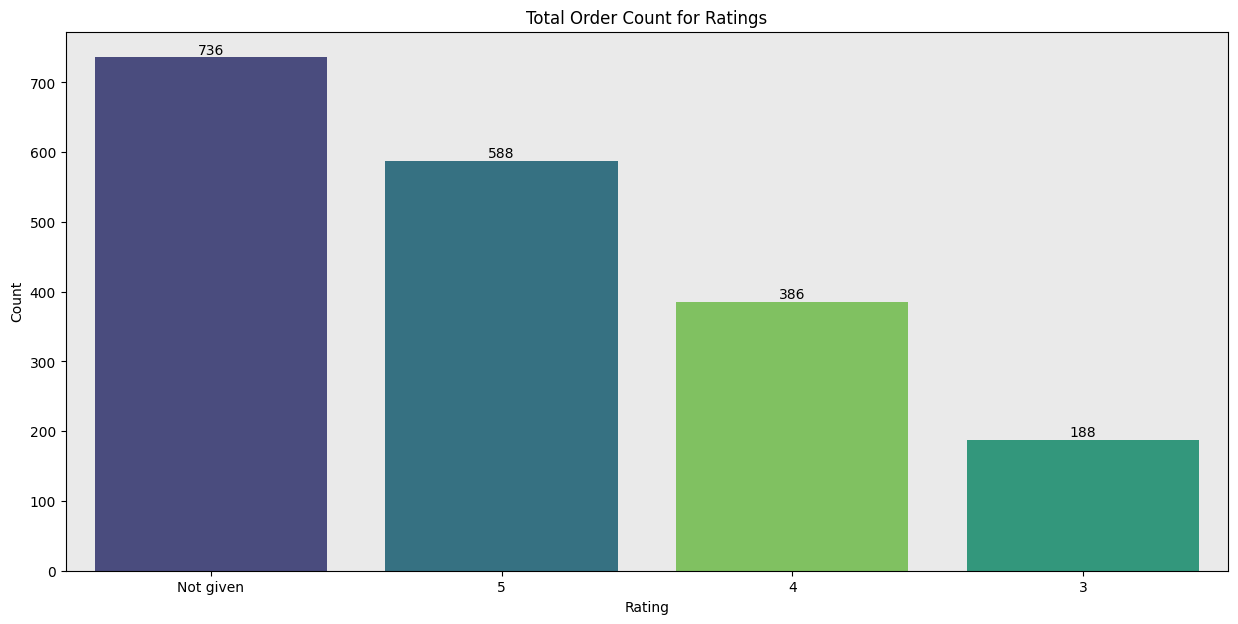

In [29]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis', hue='rating')
plt.title('Total Order Count for Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

#### Food Preparation Time:

In [30]:
# Write the code here

**Histogram:**

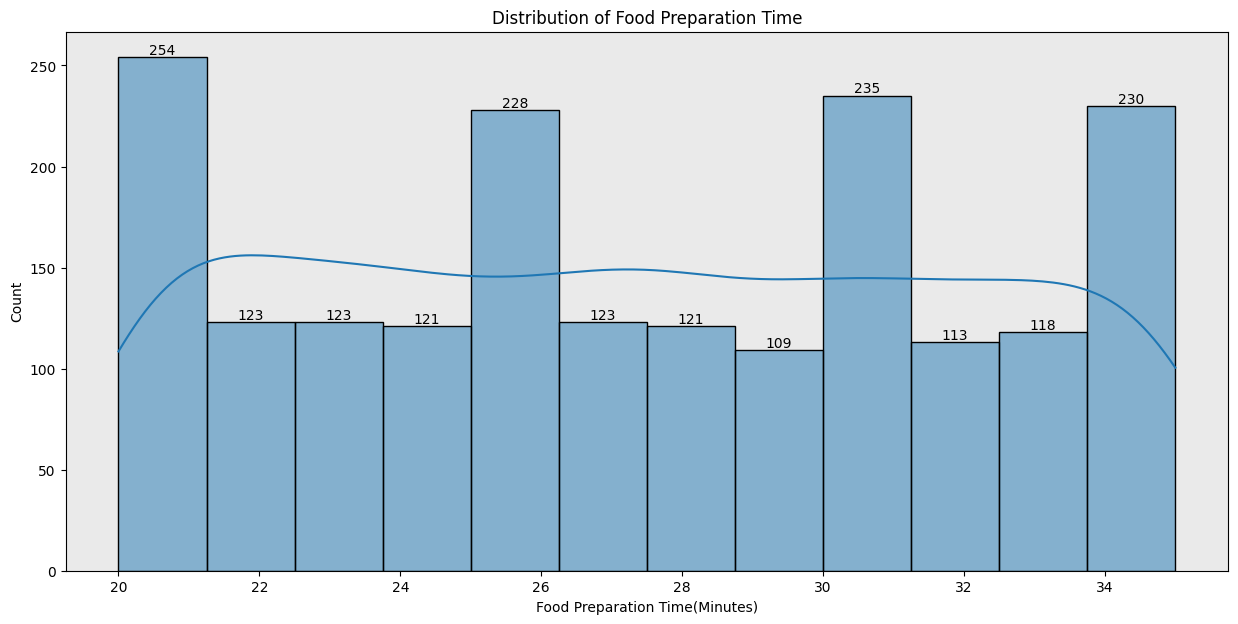

In [31]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time(Minutes)')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

**Boxplot:**

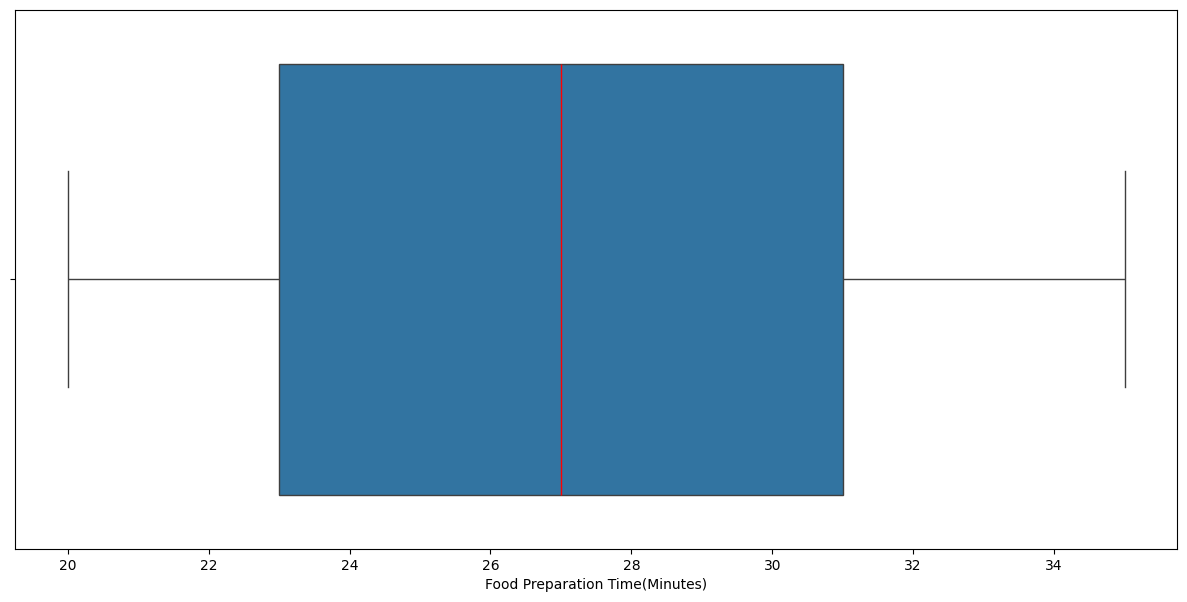

In [32]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='food_preparation_time', medianprops = {'color':'r'})
plt.xlabel('Food Preparation Time(Minutes)')
plt.show()

Observations:

**Lineplot:**

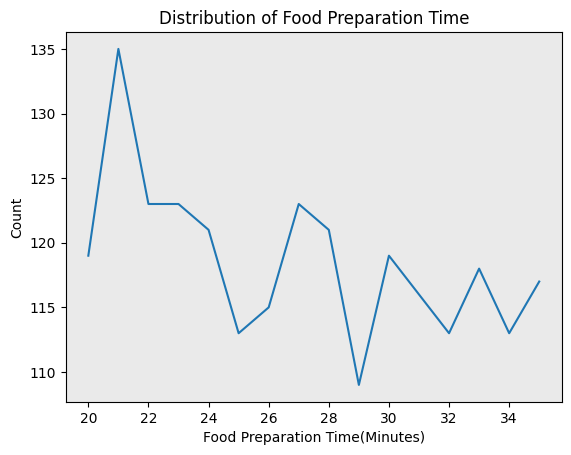

In [33]:
food_prep = df['food_preparation_time'].value_counts().reset_index()
food_prep.columns = ['food_preparation_time', 'count'] # Rename columns for clarity
sns.lineplot(data= food_prep, x='food_preparation_time', y='count').set_facecolor('#eaeaea')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time(Minutes)')
plt.ylabel('Count')
plt.show()

Observations:

#### Delivery Time

In [34]:
# Write the code here

**Histogram:**

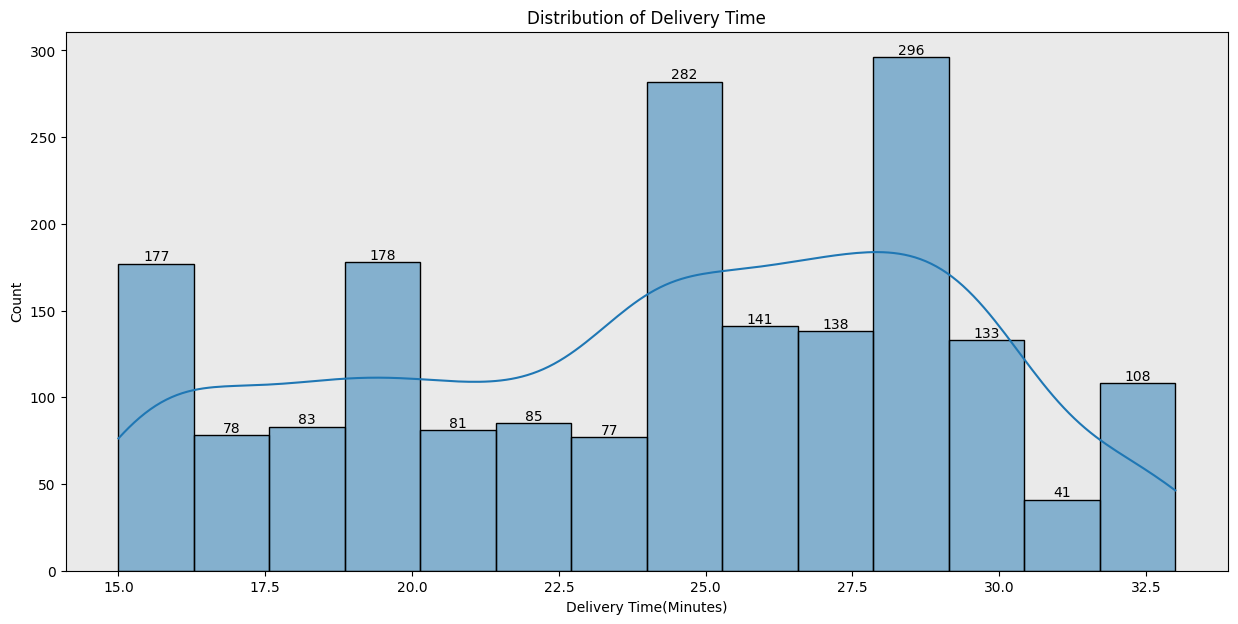

In [35]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time(Minutes)')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

**Boxplot:**

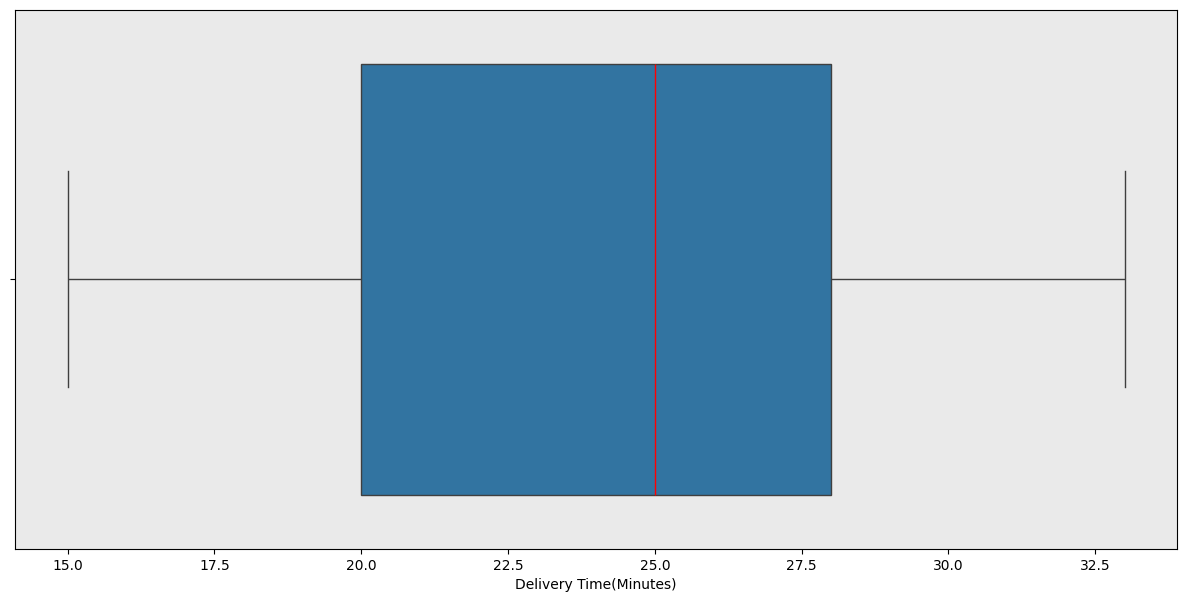

In [36]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='delivery_time', medianprops = {'color':'r'})
plt.xlabel('Delivery Time(Minutes)')
ax.set_facecolor('#eaeaea')
plt.show()

Observations:

**Lineplot:**

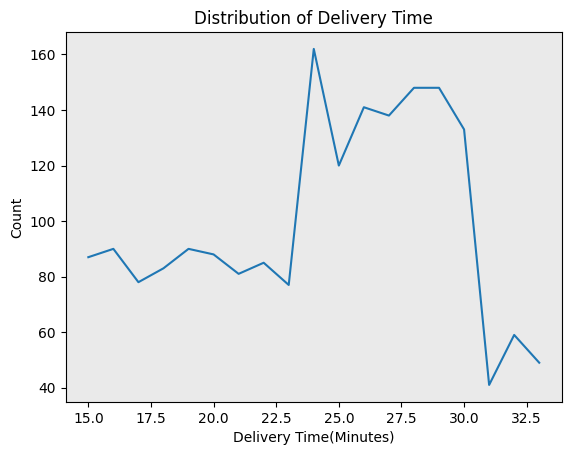

In [37]:
delivery_time = df['delivery_time'].value_counts().reset_index()
delivery_time.columns = ['delivery_time', 'count'] # Rename columns for clarity
sns.lineplot(data= delivery_time, x='delivery_time', y='count').set_facecolor('#eaeaea')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time(Minutes)')
plt.ylabel('Count')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [38]:
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: Top 5 Restaurants
1. Shake Shack: 219 orders
2. The Meatball Shop: 132 orders
3. Blue Ribbon Sushi:	119 orders
4. Blue Ribbon Fried Chicken:	96 orders
5. Parm: 68 orders





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [39]:
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(5)

,order_id
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations: American food is the most popular type of cuisine on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [40]:
print(f"Percentage of orders that cost more than 20 dollars: {(df[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]) * 100:.2f}%")

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations: 29.24 percent of orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [41]:
print(f"Mean order delivery time: {df['delivery_time'].mean():.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations: The average order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [42]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: Most Frequent Customers

1.   Customer ID: 52832, Orders: 13
2.   Customer ID: 47440, Orders: 10
3.   Customer ID: 83287, Orders: 9




## Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Variable Relationships Visualized

Cuisine Type vs Cost of the order

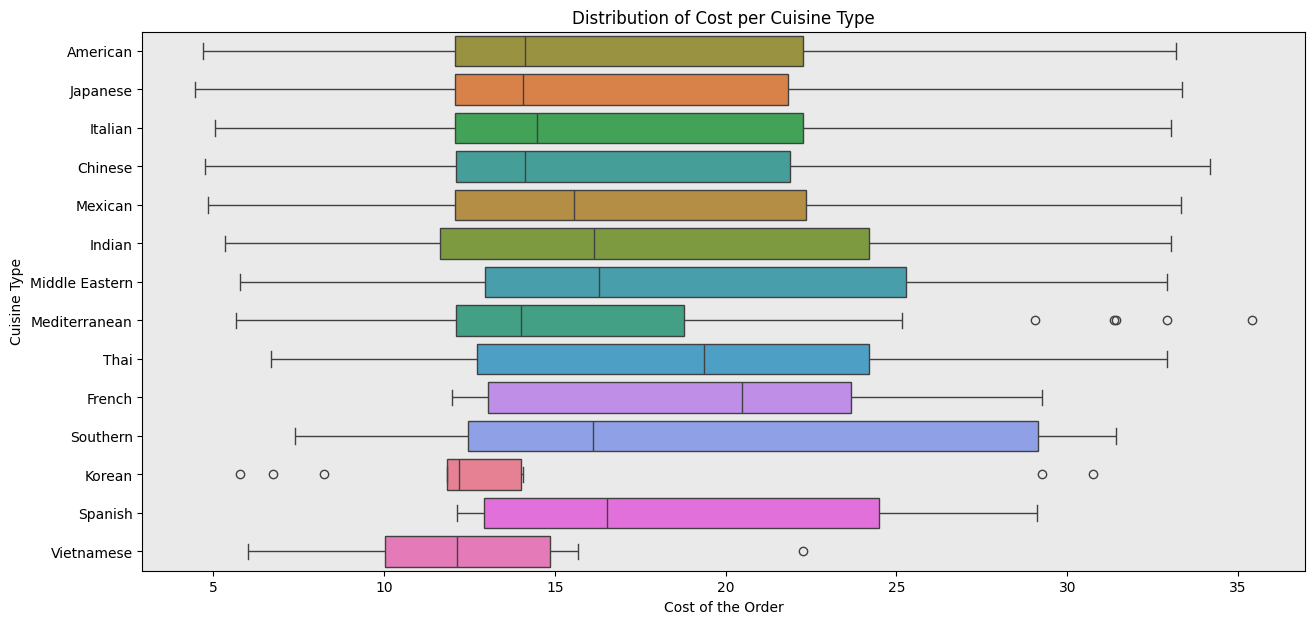

In [43]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', hue = 'cuisine_type', order = df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cost per Cuisine Type')
plt.ylabel('Cuisine Type')
plt.xlabel('Cost of the Order')
ax.set_facecolor('#eaeaea')
plt.show()

Delivery Time vs Cuisine Type

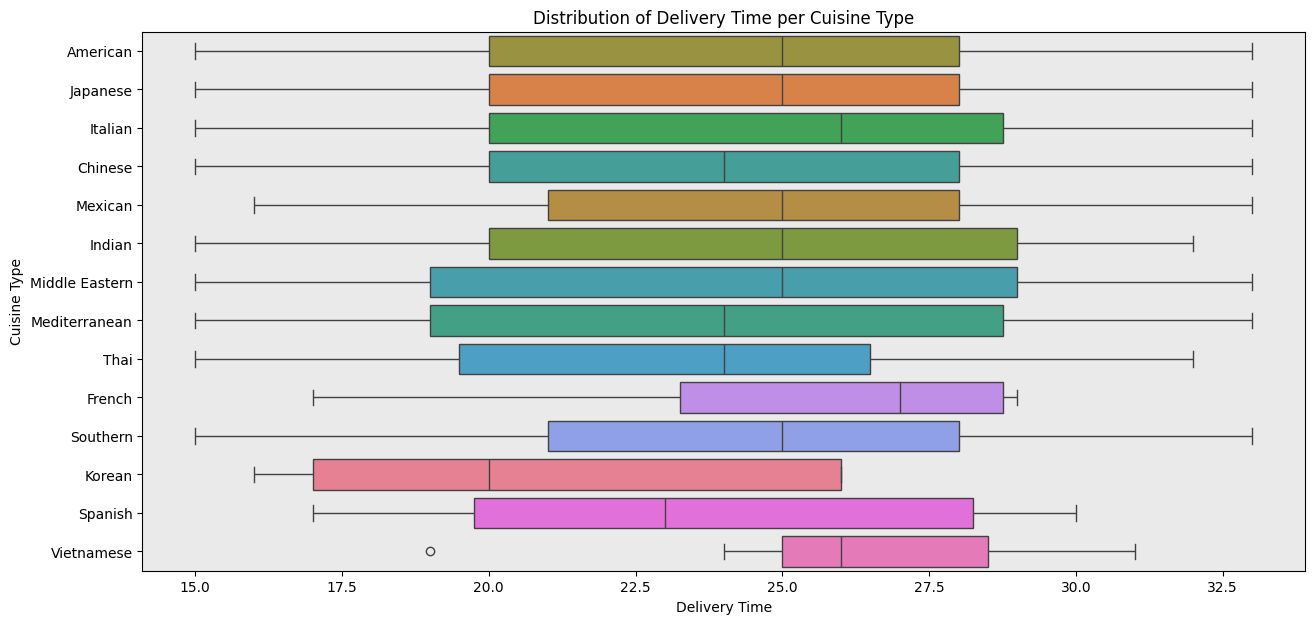

In [44]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='delivery_time', y='cuisine_type', hue = 'cuisine_type', order = df['cuisine_type'].value_counts().index)
plt.title('Distribution of Delivery Time per Cuisine Type')
plt.ylabel('Cuisine Type')
plt.xlabel('Delivery Time')
ax.set_facecolor('#eaeaea')
plt.show()

Cuisine Type vs Food Preparation time

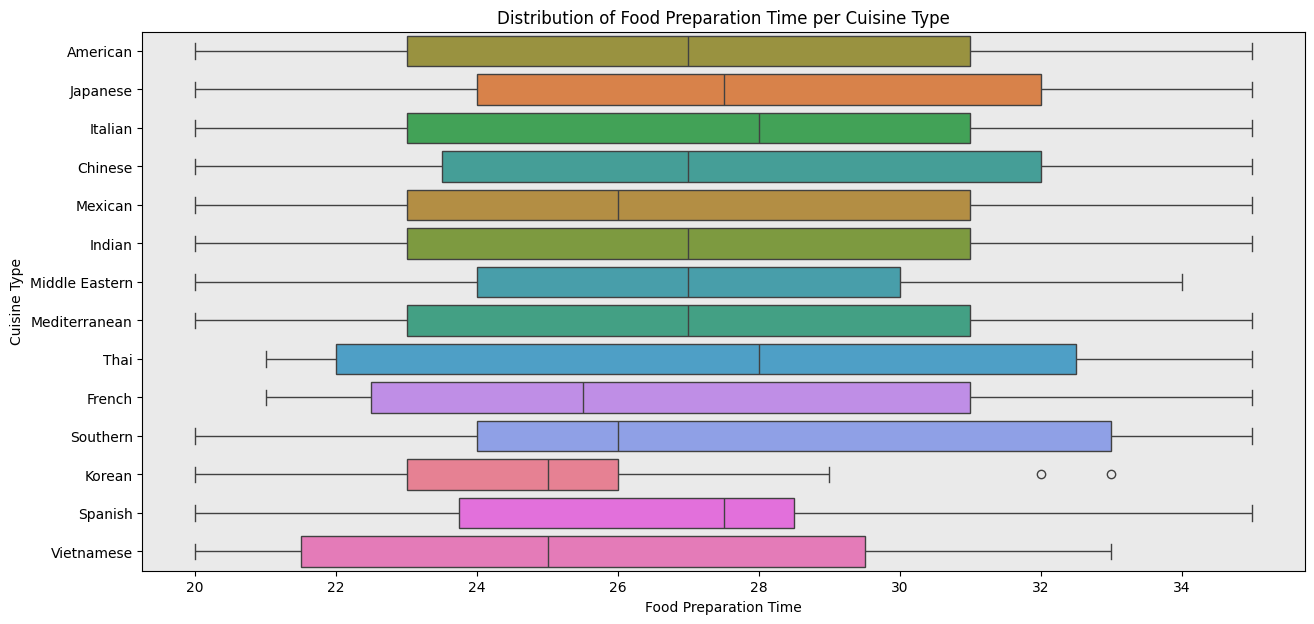

In [45]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', hue = 'cuisine_type', order = df['cuisine_type'].value_counts().index)
plt.title('Distribution of Food Preparation Time per Cuisine Type')
plt.ylabel('Cuisine Type')
plt.xlabel('Food Preparation Time')
ax.set_facecolor('#eaeaea')
plt.show()

Cuisine Type vs Order Count

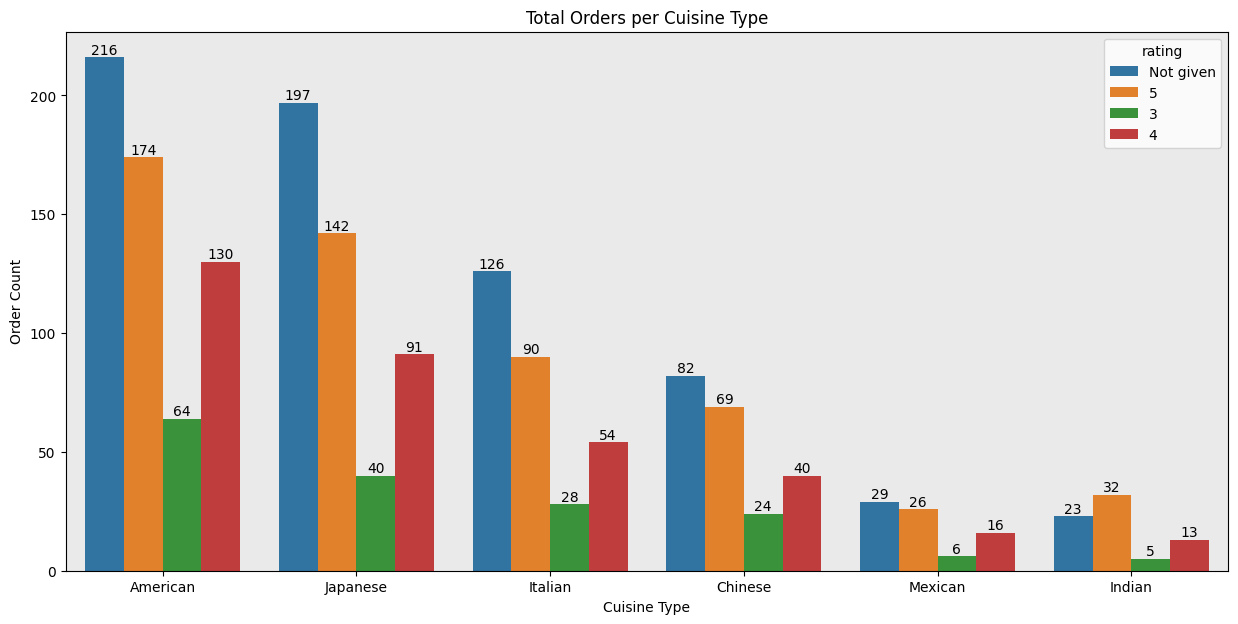

In [46]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='cuisine_type', hue='rating', order = df['cuisine_type'].value_counts().head(6).index)
plt.title('Total Orders per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
ax.set_facecolor('#eaeaea')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Cuisine Type vs Hue Day of the week

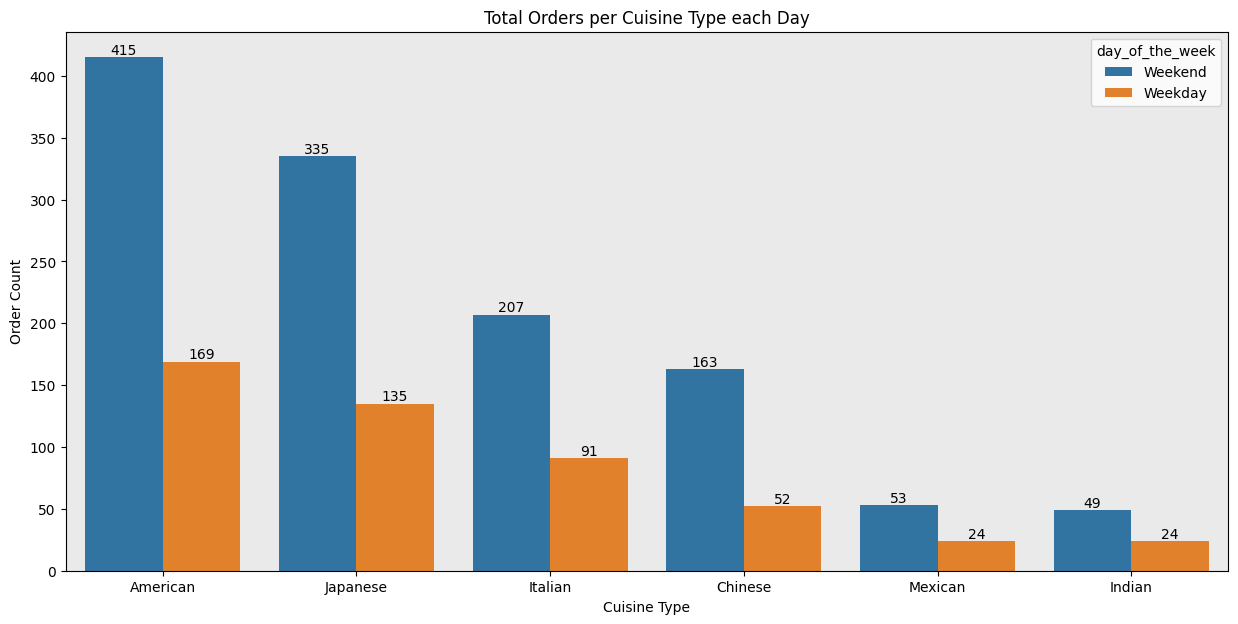

In [47]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order = df['cuisine_type'].value_counts().head(6).index)
plt.title('Total Orders per Cuisine Type each Day')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
ax.set_facecolor('#eaeaea')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Distribution of Delivery Time per Day

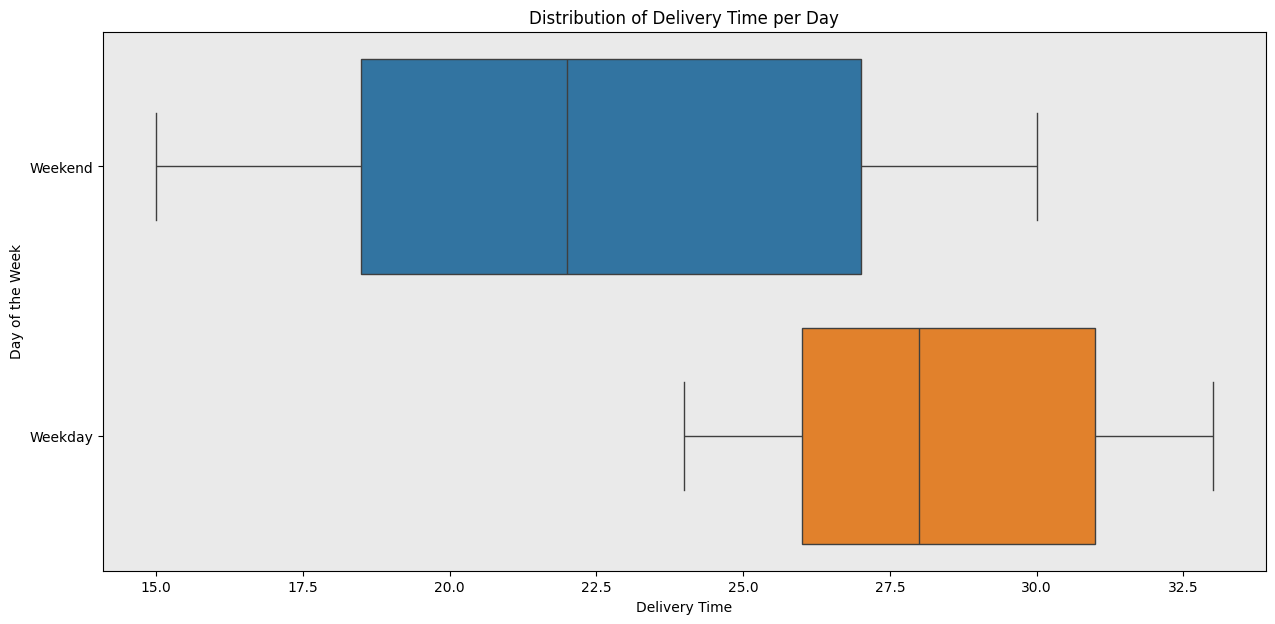

In [48]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='delivery_time', y='day_of_the_week', hue = 'day_of_the_week', order = df['day_of_the_week'].value_counts().index, orient='horizontal')
plt.title('Distribution of Delivery Time per Day')
plt.ylabel('Day of the Week')
plt.xlabel('Delivery Time')
ax.set_facecolor('#eaeaea')
plt.show()

Day of the Week vs Delivery time

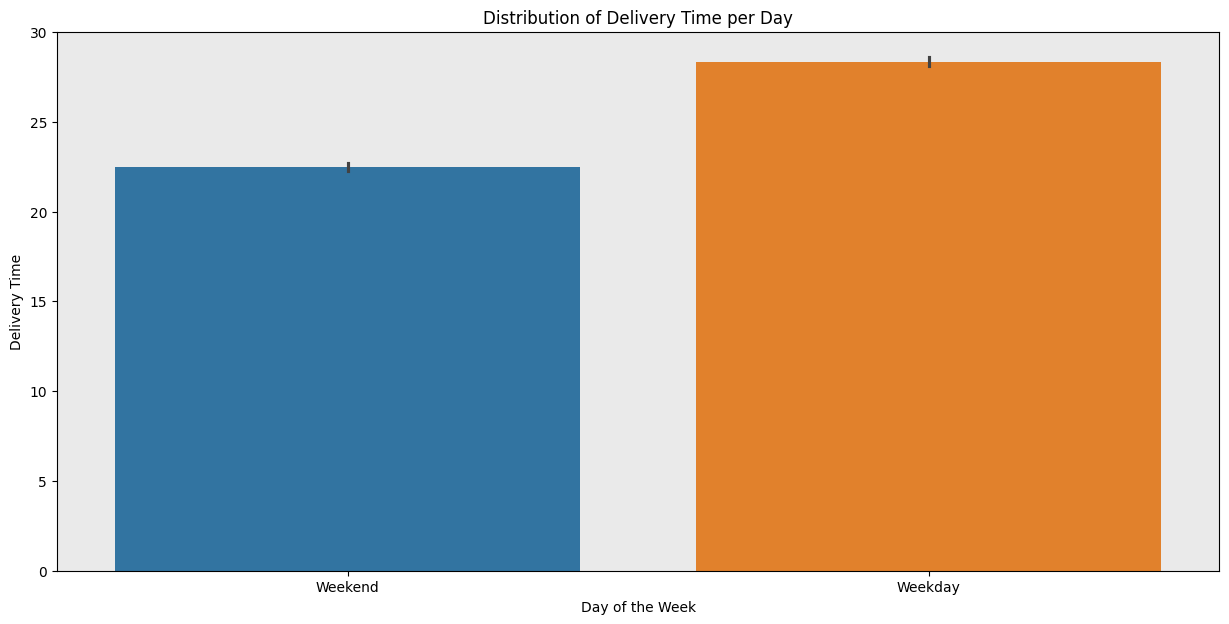

In [49]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x='day_of_the_week', y='delivery_time', hue = 'day_of_the_week')
plt.title('Distribution of Delivery Time per Day')
plt.ylabel('Delivery Time')
plt.xlabel('Day of the Week')
ax.set_facecolor('#eaeaea')
plt.show()

Day of the week vs Cost of the order

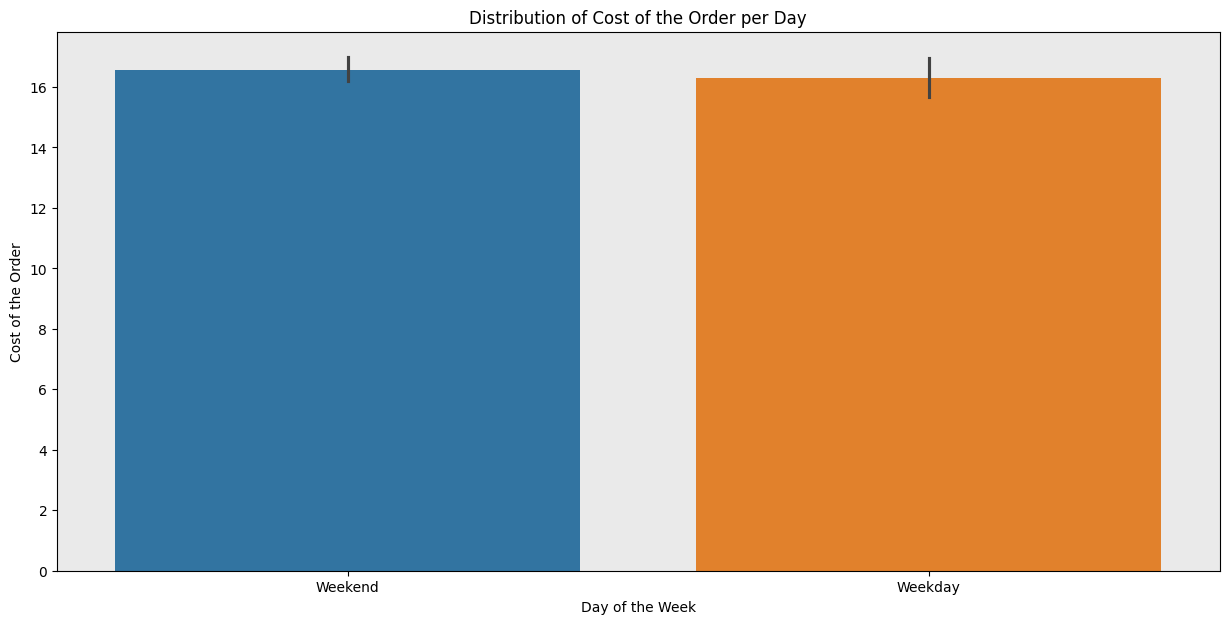

In [50]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue = 'day_of_the_week')
plt.title('Distribution of Cost of the Order per Day')
plt.ylabel('Cost of the Order')
plt.xlabel('Day of the Week')
ax.set_facecolor('#eaeaea')
plt.show()

Food Preparation time vs Day of the week

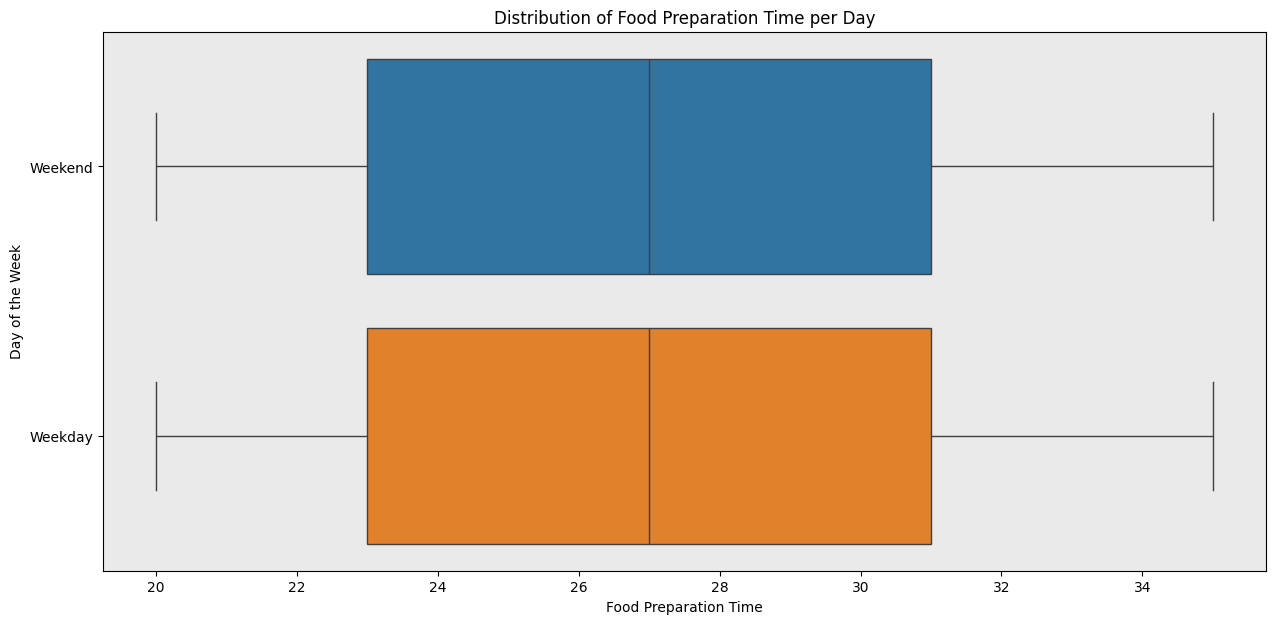

In [51]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week', hue = 'day_of_the_week', order = df['day_of_the_week'].value_counts().index)
plt.title('Distribution of Food Preparation Time per Day')
plt.ylabel('Day of the Week')
plt.xlabel('Food Preparation Time')
ax.set_facecolor('#eaeaea')

plt.show()

Rating vs Delivery time

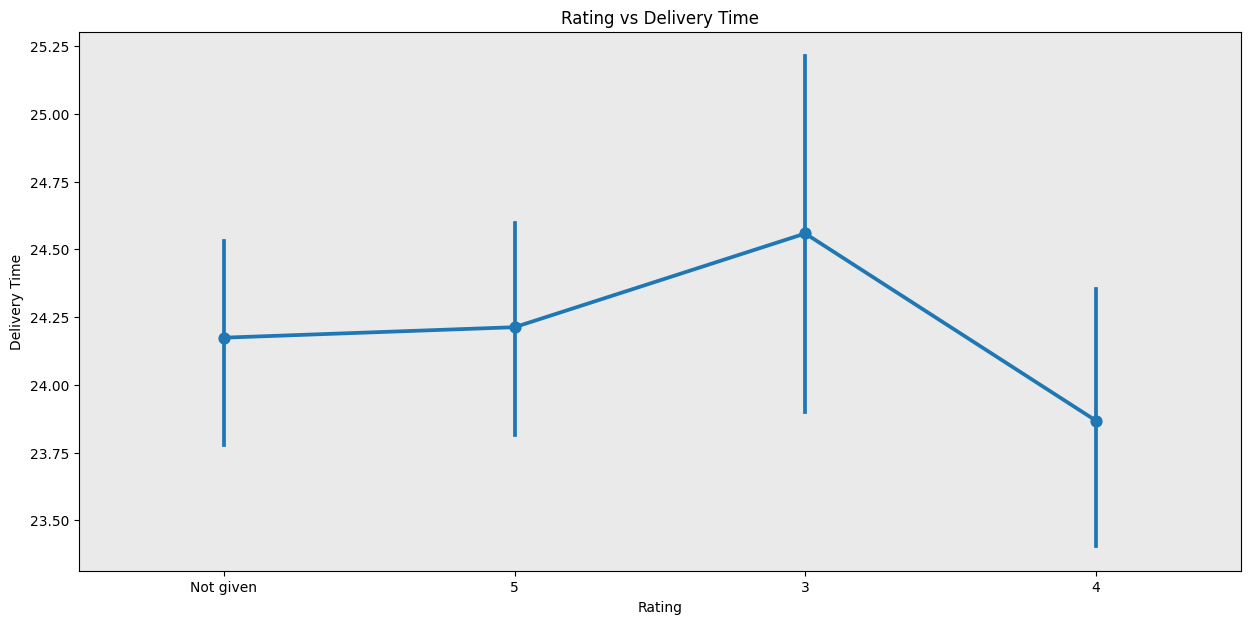

In [52]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(data=df, x='rating', y='delivery_time')
plt.title('Rating vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
ax.set_facecolor('#eaeaea')
plt.show()

Rating vs Food Preparation time

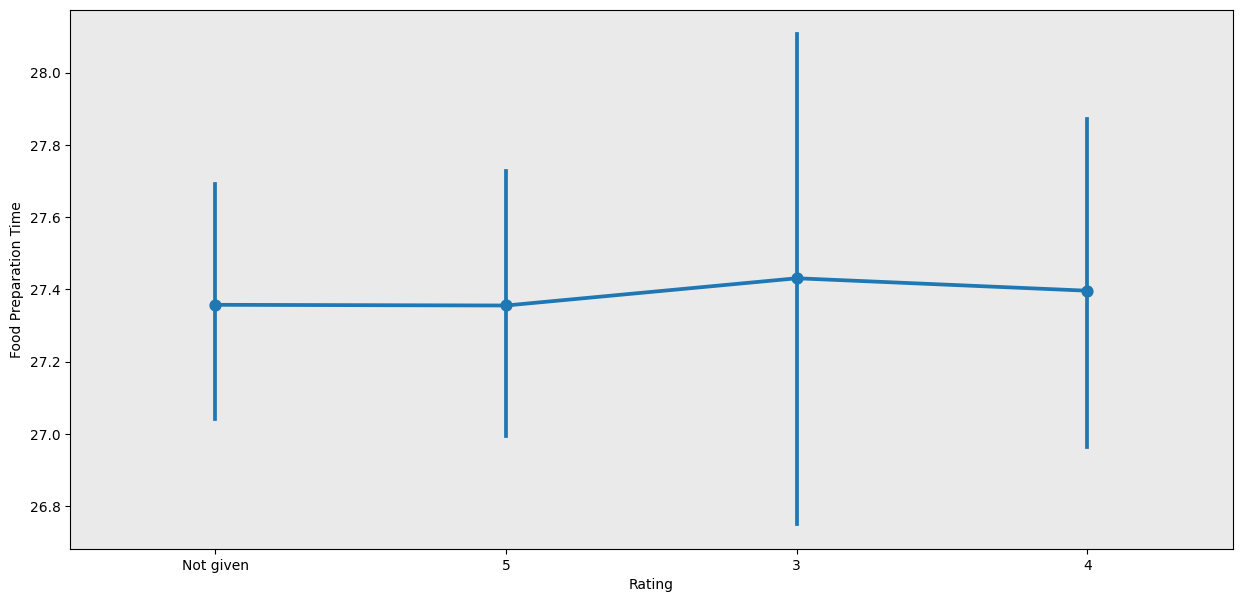

In [53]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
ax.set_facecolor('#eaeaea')
plt.show()

Rating vs Cost of the order

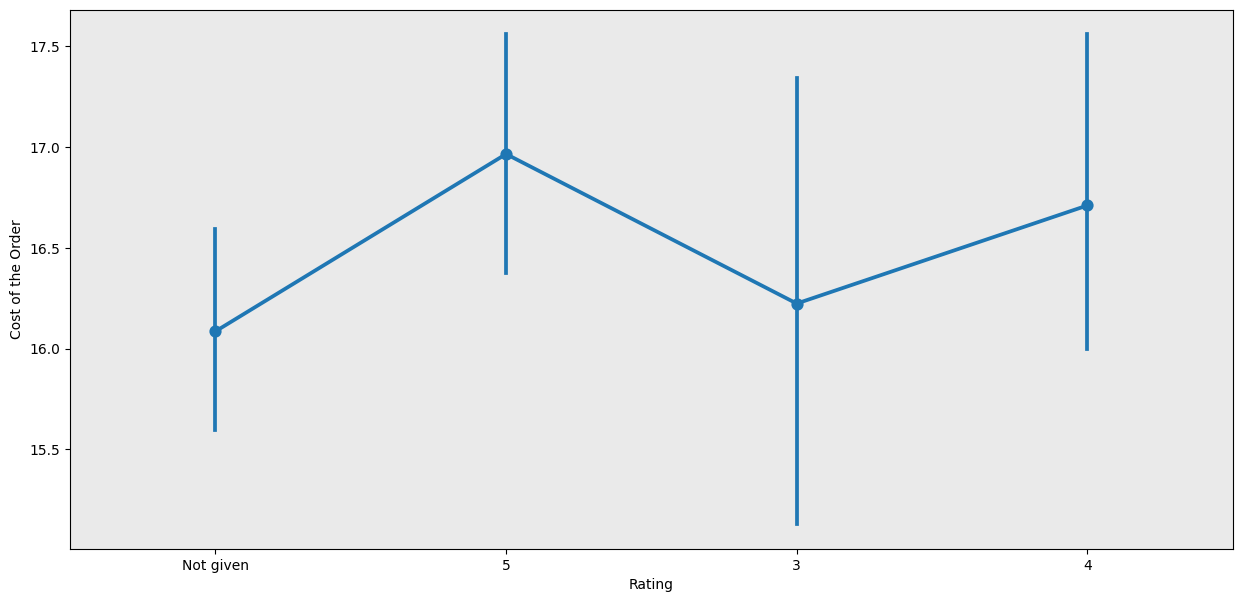

In [54]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
ax.set_facecolor('#eaeaea')
plt.show()

Restaurant Name vs Cost of the order

Numerical Variable Relationship Pairplot

<Figure size 1500x700 with 0 Axes>

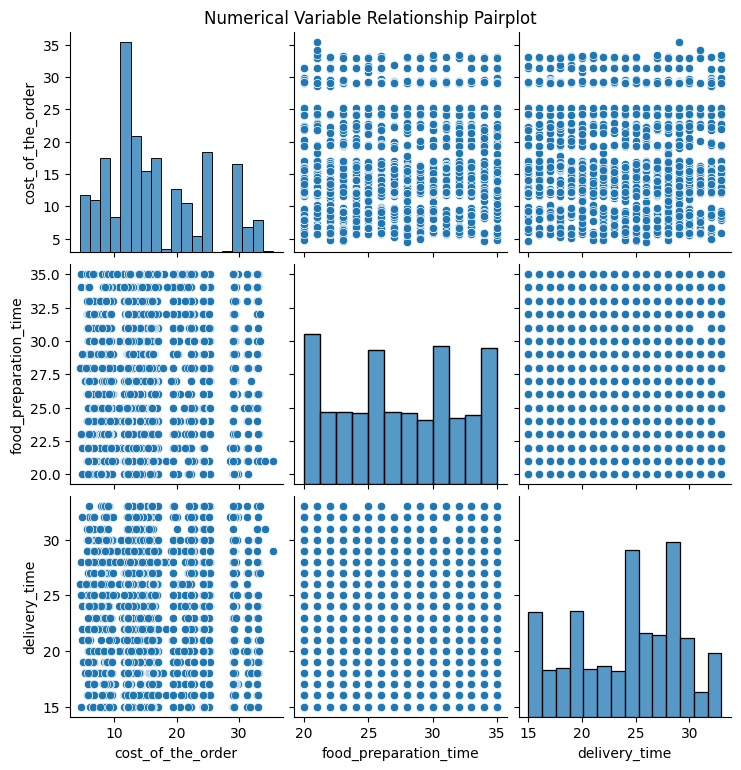

In [55]:
plt.figure(figsize=(15, 7))
ax = sns.pairplot(data = df[['cost_of_the_order','food_preparation_time','delivery_time']])
ax.fig.suptitle("Numerical Variable Relationship Pairplot", y=1.02)
ax.fig.subplots_adjust(top=.99)
plt.show()

Variable Heatmap

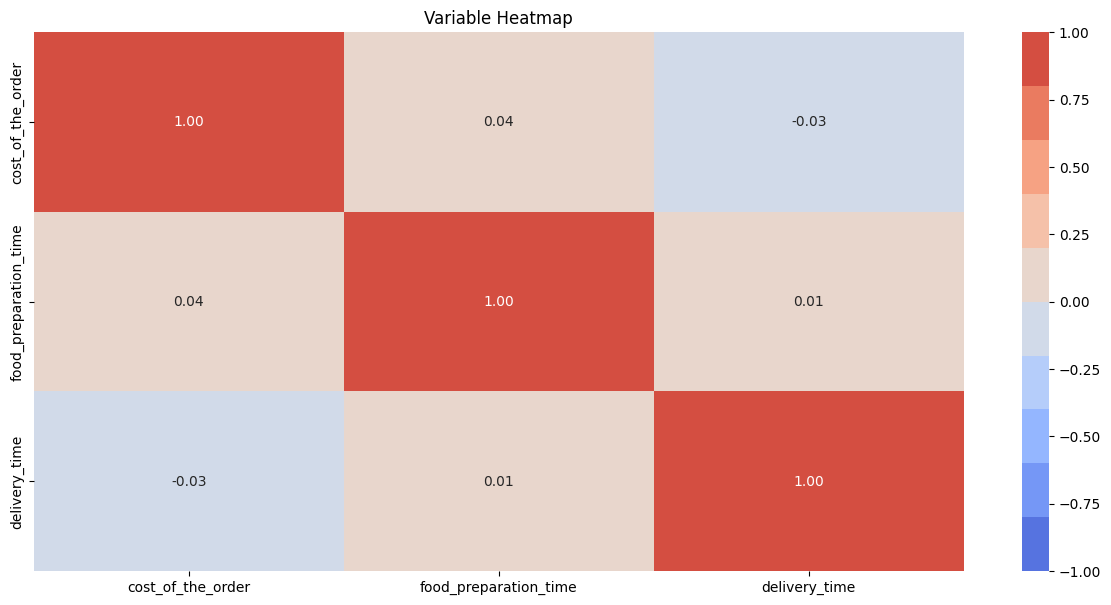

In [56]:
plt.figure(figsize=(15, 7))
ax = sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True,vmin=-1, vmax=1, fmt='.2f', cmap = sns.color_palette('coolwarm', 10))
ax.set_title('Variable Heatmap')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [57]:
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_sorted = df_rated.groupby(by = ['restaurant_name']).agg(count = ('rating', 'size'), mean = ('rating', 'mean')).loc[lambda agg: (agg['count'] > 50) & (agg['mean'] > 4)].sort_values(by = 'mean', ascending = False).reset_index()
df_sorted.head()

,restaurant_name,count,mean
0,The Meatball Shop,84,4.511905
1,Blue Ribbon Fried Chicken,64,4.328125
2,Shake Shack,133,4.278195
3,Blue Ribbon Sushi,73,4.219178


#### Observations: The restaurants that fill this criteria are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shake, and Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [58]:
def generate_revenue(cost):
    if cost > 20: return cost * 0.25
    elif cost > 5: return cost * 0.15
    else: return 0

df['revenue'] = df['cost_of_the_order'].apply(generate_revenue)
print(f"Net Revenue: ${df['revenue'].sum():.2f}")

Net Revenue: $6166.30


#### Observations: The net revenue generated by the company across all orders is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [59]:
total_time = df['food_preparation_time'] + df['delivery_time']
percentage = total_time[total_time > 60].shape[0] / total_time.shape[0] * 100
print(f"Percentage of orders that longer than 60 minutes to get delivered: {percentage:.2f}%")

Percentage of orders that longer than 60 minutes to get delivered: 10.54%


#### Observations: The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [60]:
print(f"The mean delivery time on the weekday is {df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean():.2f}%.")
print(f"The mean delivery time on the weekend is {df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean():.2f}%.")

The mean delivery time on the weekday is 28.34%.
The mean delivery time on the weekend is 22.47%.


#### Observations: The mean delivery time on the weekday is 28.34%. The mean delivery time on the weekend is 22.47%.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Delivery times are better on weekends compared to weekdays.
* A majority of customers are single delivery customers.
* Restaurants with higher ratings have more deliveries.
* The top three restaurants get fulfilled over 100 deliveries.

#### Recommendations:

* Offer first time customers discounts for future orders after completing their first order.
* Offer customers that have only ordered a certain type of cuisine discounts when ordering other cuisine types.
* Add a surge charge to weekend orders to try to combat delivery congestion so delivery times are improved.
* Encourage customers to rate orders more often so there is more accurate data to analyze.

In [61]:
!jupyter nbconvert --execute --to html "/content/PYF_Project_Learner_Notebook_Full_Code.ipynb"

[NbConvertApp] Converting notebook /content/PYF_Project_Learner_Notebook_Full_Code.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] WARNING | Alternative text is missing on 38 image(s).
[NbConvertApp] Writing 2407240 bytes to /content

---